In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
merged_files_filtered = pd.read_csv('./data/stress_urinary_incontinence.csv')

In [3]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

# Perform sentiment analysis using the VADER lexicon
sia = SentimentIntensityAnalyzer()
merged_files_filtered['sentiment'] = merged_files_filtered['FOI_TEXT'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a year column based on the DATE_RECEIVED column
merged_files_filtered['year'] = merged_files_filtered['DATE_RECEIVED'].dt.year

# Group the data by year and sentiment and count the number of reviews in each group
grouped_data = merged_files_filtered.groupby(['year', 'sentiment'])['FOI_TEXT'].count().reset_index()

# Pivot the data to create a matrix with years as rows, sentiment as columns, and review counts as values
pivoted_data = grouped_data.pivot(index='year', columns='sentiment', values='FOI_TEXT').fillna(0)

In [8]:
merged_files_filtered['sentiment'].head()

0   -0.2960
1   -0.2960
2    0.0000
3   -0.0351
4   -0.7761
Name: sentiment, dtype: float64

In [4]:
# Perform K-Means clustering on the sentiment scores, with 3 clusters (negative, neutral, positive)
kmeans = KMeans(n_clusters=3, random_state=0).fit(merged_files_filtered[['sentiment']])

# Add a cluster column to the data
merged_files_filtered['cluster'] = kmeans.labels_

# Group the data by year and cluster and count the number of reviews in each group
grouped_data = merged_files_filtered.groupby(['year', 'cluster'])['FOI_TEXT'].count().reset_index()

# Pivot the data to create a matrix with years as rows, clusters as columns, and review counts as values
pivoted_data = grouped_data.pivot(index='year', columns='cluster', values='FOI_TEXT').fillna(0)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


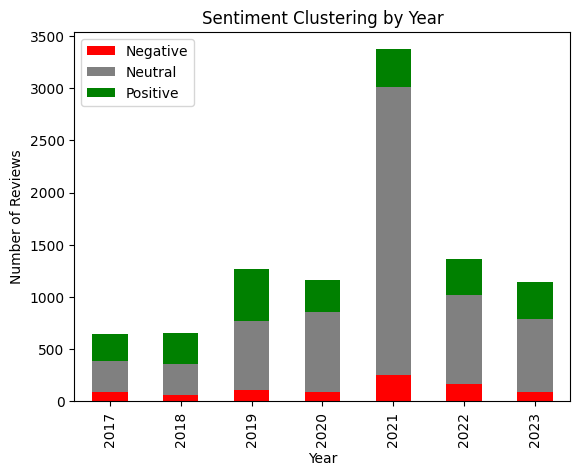

In [5]:
colors = ['r', 'gray', 'g']
labels = ['Negative', 'Neutral', 'Positive']
pivoted_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Sentiment Clustering by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(labels=labels, loc='upper left')
plt.show()

In [9]:
patient_text = merged_files_filtered["FOI_TEXT"].dropna()

In [10]:
mesh_text = ' '.join(str(review) for review in patient_text )

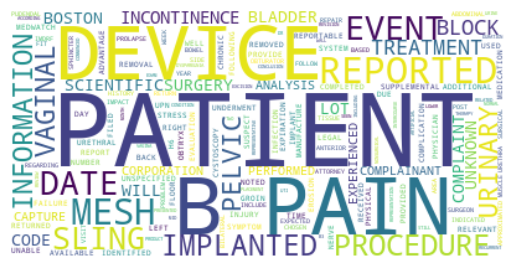

In [11]:
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(mesh_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()